In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
# Convert Yes/No to 0/1
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [6]:
# Convert City to numerical codes
df['City'] = df['City'].astype('category').cat.codes  

In [7]:
print(df['Cuisines'].dtype)

object


In [8]:
df['Cuisines'] = df['Cuisines'].astype(str)

In [9]:
df['Cuisines'] = df['Cuisines'].fillna("Unknown")


In [10]:
df = pd.get_dummies(df, columns=['Cuisines'], drop_first=True)

In [11]:
df.info()  # Check data types and column changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Columns: 1845 entries, Restaurant ID to Cuisines_nan
dtypes: bool(1825), float64(3), int16(1), int64(7), object(9)
memory usage: 18.0+ MB


In [12]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print("Total Missing Values:", df.isnull().sum().sum())

Series([], dtype: int64)
Total Missing Values: 0


In [13]:
df.describe()

,Restaurant ID,Country Code,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,78.301434,64.126574,25.854381,1199.210763,0.121244,0.256622,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,23.198915,41.467058,11.007935,16121.183073,0.326428,0.436792,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,76.000000,77.081343,28.478713,250.000000,0.000000,0.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,88.000000,77.191964,28.570469,400.000000,0.000000,0.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,88.000000,77.282006,28.642758,700.000000,0.000000,1.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,140.000000,174.832089,55.976980,800000.000000,1.000000,1.000000,4.000000,4.900000,10934.000000


In [14]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,...,"Cuisines_Turkish, Arabian, Moroccan, Lebanese","Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Cuisines_nan
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,...,False,False,False,False,False,False,False,False,False,False
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,...,False,False,False,False,False,False,False,False,False,False
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,4000,...,False,False,False,False,False,False,False,False,False,False
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1500,...,False,False,False,False,False,False,False,False,False,False
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,140,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,80,...,False,False,False,False,False,False,False,False,False,False
9547,5908749,Ceviz A��ac۱,208,140,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,105,...,False,False,False,False,False,False,False,False,True,False
9548,5915807,Huqqa,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,170,...,False,False,False,False,False,False,False,False,False,False
9549,5916112,A���k Kahve,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,120,...,False,False,False,False,False,False,False,False,False,False


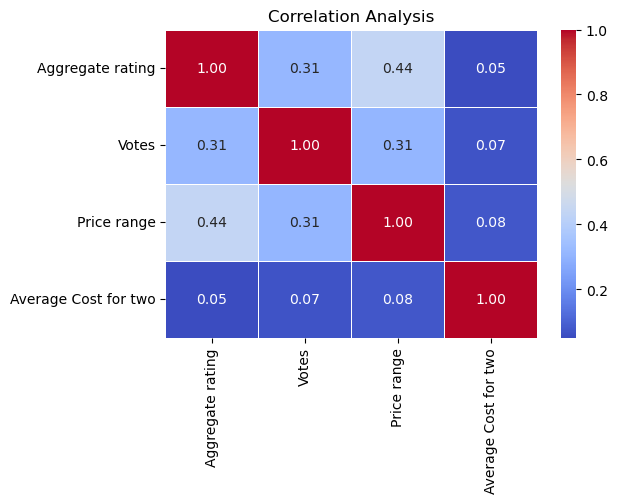

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
selected_features = ["Aggregate rating", "Votes", "Price range", "Average Cost for two"]

# Compute correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Set figure size
plt.figure(figsize=(6, 4))

# Heatmap plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Analysis")

# Show plot
plt.show()

I use a **boxplot** to analyze the distribution of restaurant ratings and identify outliers.

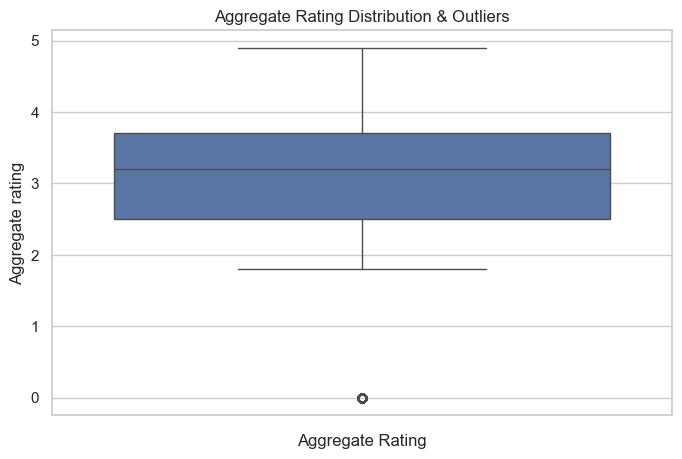

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Aggregate rating']) 
plt.title("Aggregate Rating Distribution & Outliers")
plt.xlabel("Aggregate Rating")
plt.show()

Most restaurants have high ratings, suggesting customer satisfaction.

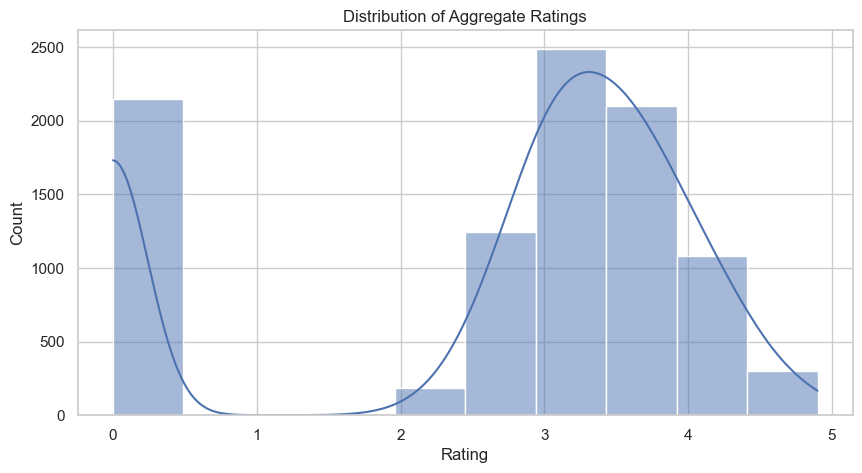

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Higher price ranges correlate with higher costs.

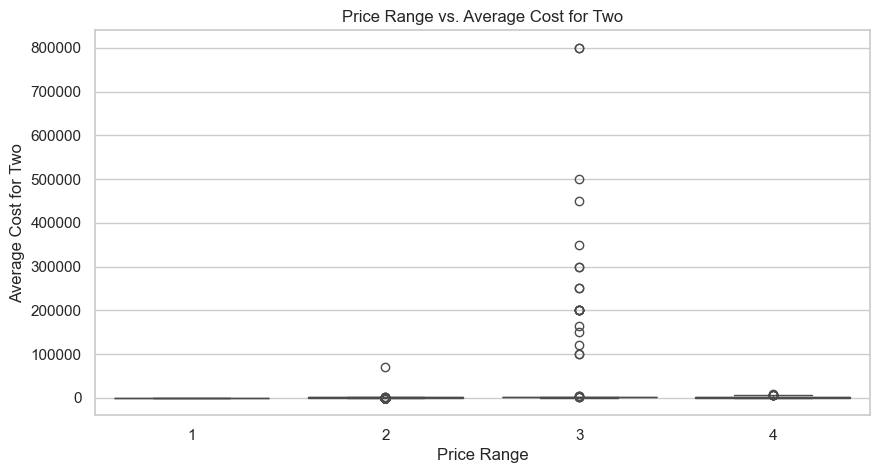

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Price range", y="Average Cost for two", data=df)
plt.title("Price Range vs. Average Cost for Two")
plt.xlabel("Price Range")
plt.ylabel("Average Cost for Two")
plt.show()

Some cities dominate the restaurant industry.

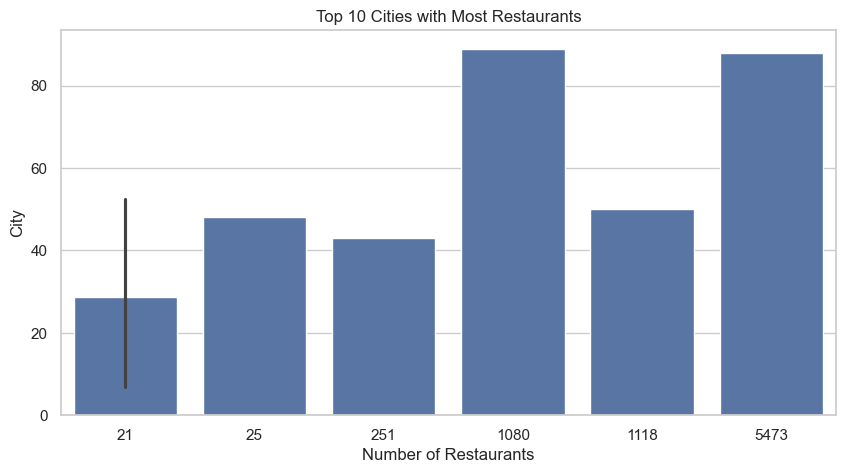

In [38]:
top_cities = df["City"].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


Many restaurants still do not offer online delivery.

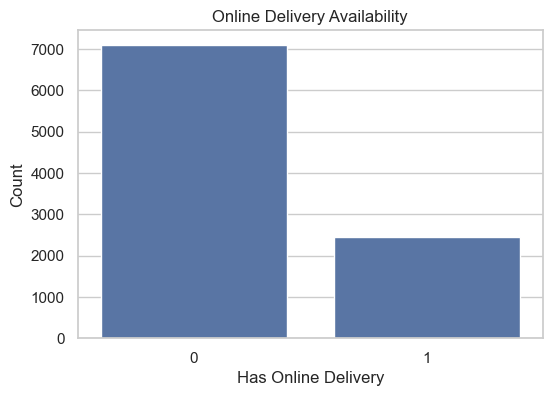

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Has Online delivery", data=df)
plt.title("Online Delivery Availability")
plt.xlabel("Has Online Delivery")
plt.ylabel("Count")
plt.show()

Most restaurants receive a low number of votes, with a few being very popular.

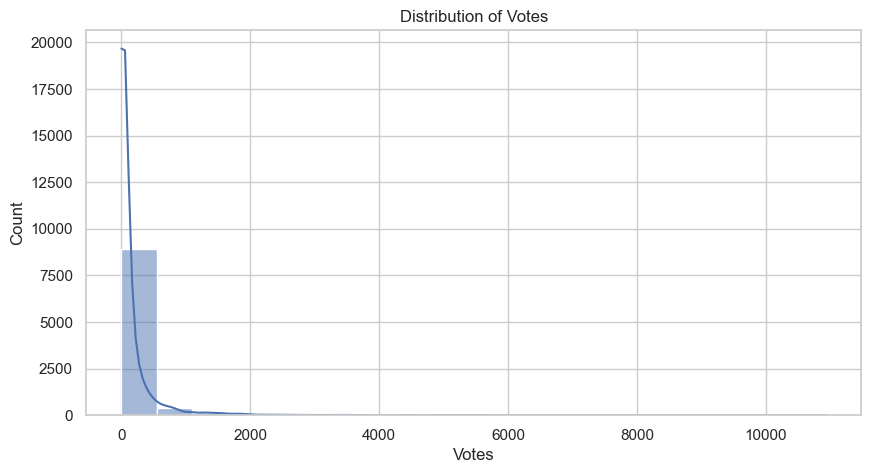

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Votes"], bins=20, kde=True)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

Higher ratings tend to attract more votes.

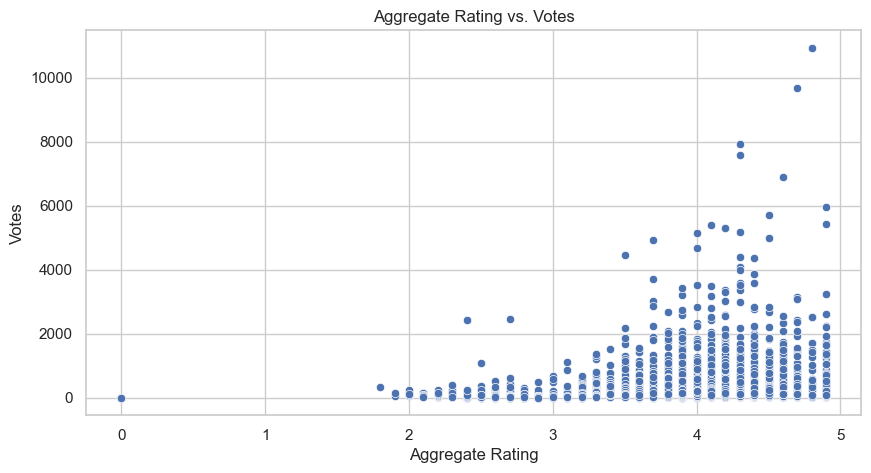

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Aggregate rating", y="Votes", data=df)
plt.title("Aggregate Rating vs. Votes")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()

Majority of restaurants fall in the 'Good' or 'Very Good' category.

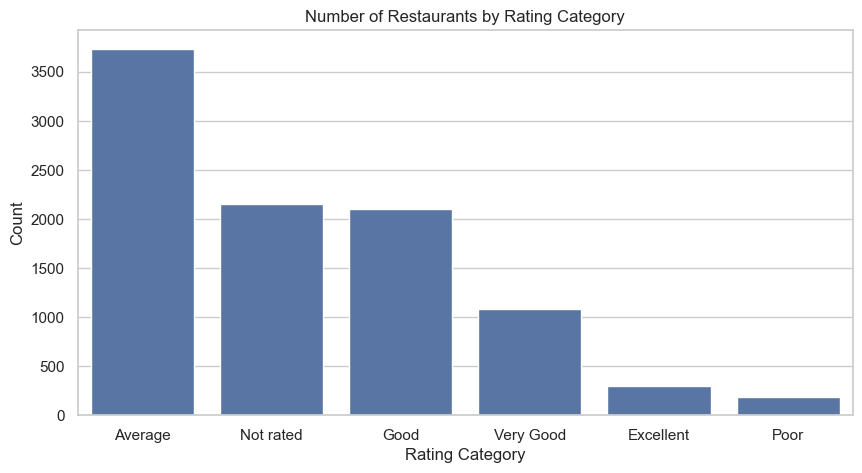

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Rating text", data=df, order=df["Rating text"].value_counts().index)
plt.title("Number of Restaurants by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.show()

Many restaurants do not offer table booking, indicating a preference for casual dining.

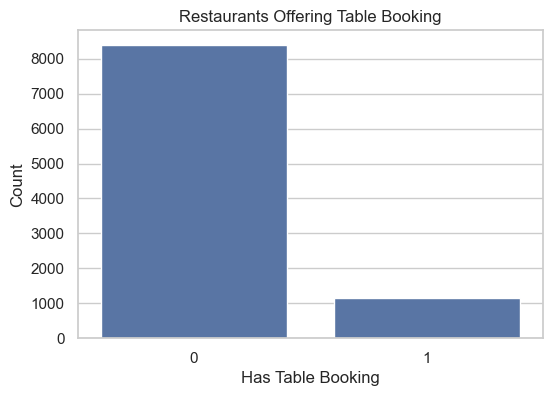

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Has Table booking", data=df)
plt.title("Restaurants Offering Table Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Count")
plt.show()


Most restaurants fall within mid-range price categories.

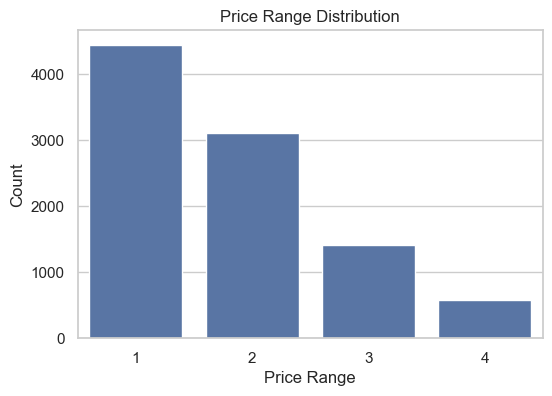

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Price range", data=df)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()
